In [1]:
import pandas as pd
import datetime
import os
import matplotlib.pyplot as plt
import requests
import numpy as np
import seaborn as sns


In [7]:
df = pd.DataFrame([])
for name in ['Jan','Feb','Mar','Apr','May','Jun','Jul']:
    tmp = pd.read_excel('HEDNO_overpwr_'+name+'_2024.xlsx', engine='openpyxl')
    tmp = tmp.loc[(tmp['Nr. of power alarms L1']+ tmp['Nr. of power alarms L2'] + tmp['Nr. of power alarms L3'])>0]
    df = pd.concat([df,tmp])
common_transformers  = list(df['Transformer'].unique())
custom_dict = {'Jan 2024':0,'Feb 2024':1, 'Mar 2024':2, 'Apr 2024':3, 'May 2024':4,'Jun 2024':5,'Jul 2024':6}
set1 = set(common_transformers)
months = ['Jan 2024', 'Feb 2024', 'Mar 2024', 'Apr 2024', 'May 2024','Jun 2024','Jul 2024']  # Replace with your actual list of months
filepath = 'E:/Meazon Projects/thingsboard/mi6/HEDNOKPIs/ovp_Alarms_raw_data/'
phasedict = {'L1':'A','L2':'B','L3':'C'}

In [8]:
def get_dev_info(device, address):
    
    r = requests.post(address + "/api/auth/login",
                      json={'username': 'meazonpro@meazon.com', 'password': 'meazonpro1'}).json()
    
    # acc_token is the token to be used in the next request
    acc_token = 'Bearer' + ' ' + r['token']
    
    # get devid by serial name
    r1 = requests.get(
        url=address + "/api/tenant/devices?deviceName=" + device,
        headers={'Content-Type': 'application/json', 'Accept': '*/*', 'X-Authorization': acc_token}).json()
    
    label = r1['label']
    devid = r1['id']['id']
    r1 = requests.get(
        url=address + "/api/device/" + devid + "/credentials",
        headers={'Content-Type': 'application/json', 'Accept': '*/*', 'X-Authorization': acc_token}).json()
    devtoken = r1['credentialsId']

    
    return devid,acc_token,label

labeldict = {}


address = 'https://mi6.meazon.com'
r = requests.post(address + "/api/auth/login",
                    json={'username': 'meazonpro@meazon.com', 'password': 'meazonpro1'}).json()

acc_token = 'Bearer' + ' ' + r['token']
entityId = '47545f30-5b7f-11ee-b2c9-653b42f73605'# DEDDHE ATHINAS
r1 = requests.get(url=address + "/api/entityGroup/"+entityId+"/entities?pageSize=1000&page=0",headers={'Content-Type': 'application/json', 
'Accept': '*/*', 'X-Authorization': acc_token}).json()


for i in range(0,len(r1['data'])):
    #   os.chdir('/home/azureuser/deddhePDF/')
    assetid = r1['data'][i]['id']['id']
    assetname = r1['data'][i]['name']

    if assetname[0]!='0':
    
        r2 = requests.get(url=address + "/api/relations/info?fromId="+assetid+"&fromType=ASSET",headers={'Content-Type': 'application/json', 'Accept': '*/*', 'X-Authorization': acc_token}).json()
        
        
        for j in range(0, len(r2)):
            device = r2[j]['toName']
            if device[:3]=='102':
                
                #try:
                [devid, acc_token, label] = get_dev_info(device, address)
                labeldict[label] = device
print(labeldict)

{'ΜΜ - 016': '102.408.001992', 'ΜΜ -322': '102.408.001991', 'ΜΜ-024': '102.408.001988', 'ΜΜ-423': '102.408.000218', 'ΜΜ - 269': '102.408.001989', 'ΜΜ - 481': '102.408.001990', 'ΜΠ-297': '102.408.000226', 'ΜΠ-013': '102.408.000196', 'ΜΠ-368': '102.408.000221', 'ΜΜ-014': '102.408.000217', 'ΜΠ-017': '102.408.000209', 'ΜΜ-092': '102.408.000202', 'ΜΠ-112': '102.408.000207', 'ΜΠ-009': '102.408.000227', 'ΜΠ-118': '102.408.000199', 'ΜΜ-141': '102.408.000222', 'ΜΠ-550': '102.408.000204', 'ΜΠ-564': '102.408.000201', 'ΜΠ-325': '102.408.000208', 'ΜΠ-725': '102.408.000225', 'ΜΠ-110': '102.408.000205', 'ΜΠ-222': '102.408.000448', 'ΜΜ-303': '102.408.000449', 'ΜΜ-062': '102.408.000793', 'MM-185': '102.408.000224', 'ΜΝ-010': '102.408.000195', 'ΜΡ-061': '102.408.000223', 'ΜΡ-093': '102.408.000198', 'ΜΓ-019': '102.408.000228', 'ΜΤ-052': '102.408.000220', 'ΜΝ-073': '102.408.000194', 'ΜΝ-122': '102.408.000192', 'ΜΤ-055': '102.408.000211', 'ΜΠ-219': '102.408.000216', 'MM-359': '102.408.000229', 'ΜΠ-014': '1

In [4]:


def plotfig(df, ph):
    # 2D plot
    fig = plt.figure(figsize=(14, 8))
    sns.boxplot(data=df,x = 'Transformer', 
            y = 'kVA', 
            hue = 'month', 
            palette = 'Set2') 
    
    # Set plot labels and title
    plt.xlabel('Transformer')
    plt.ylabel('Overpower kVA %')
    plt.title('Overpower boxplots for phase '+ ph)
    plt.xticks(rotation=45)
    plt.legend(title='Month')
    plt.tight_layout()

    # plt.savefig('boxplot_phase'+ph+'.png', dpi=300)
    

In [5]:


def multiplotfig(df, ph):
    # Create a figure with 2 subplots (one above the other)
    # fig, axes = plt.subplots(2, 1, figsize=(14, 16))
    fig, axes = plt.subplots(2, 1, figsize=(14, 8), gridspec_kw={'height_ratios': [3, 1]})

    # First subplot: boxplot
    sns.boxplot(ax=axes[0], data=df, x='Transformer', y='kVA', hue='month', palette='Set2', whis=1.5)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Overpower kVA %')
    axes[0].set_title('Overpower boxplots for phase ' + ph)
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].legend(title='Month')
    
    # Second subplot: another plot (e.g., bar plot)
    sns.barplot(ax=axes[1], data=df, x='Transformer', y='% of time ' + ph, hue='month', palette='Set2')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('% of time')
    axes[1].set_title('Time % of overpower alarms')
    axes[1].tick_params(axis='x', rotation=45)
    # axes[1].legend(title='Month')
    axes[1].legend().remove()

    # Adjust layout
    plt.tight_layout()
    plt.savefig('boxplot_time_phase'+ph+'.png', dpi=300)
    

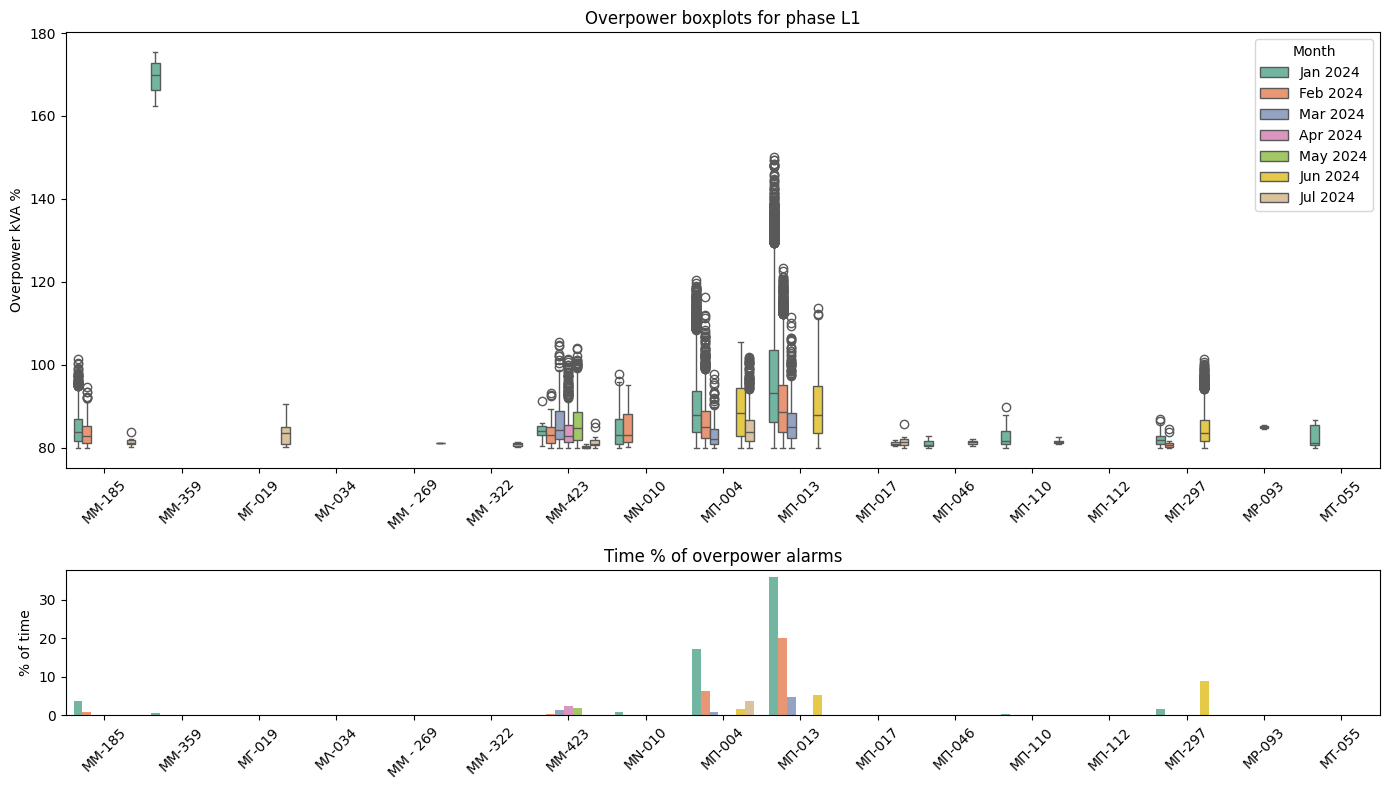

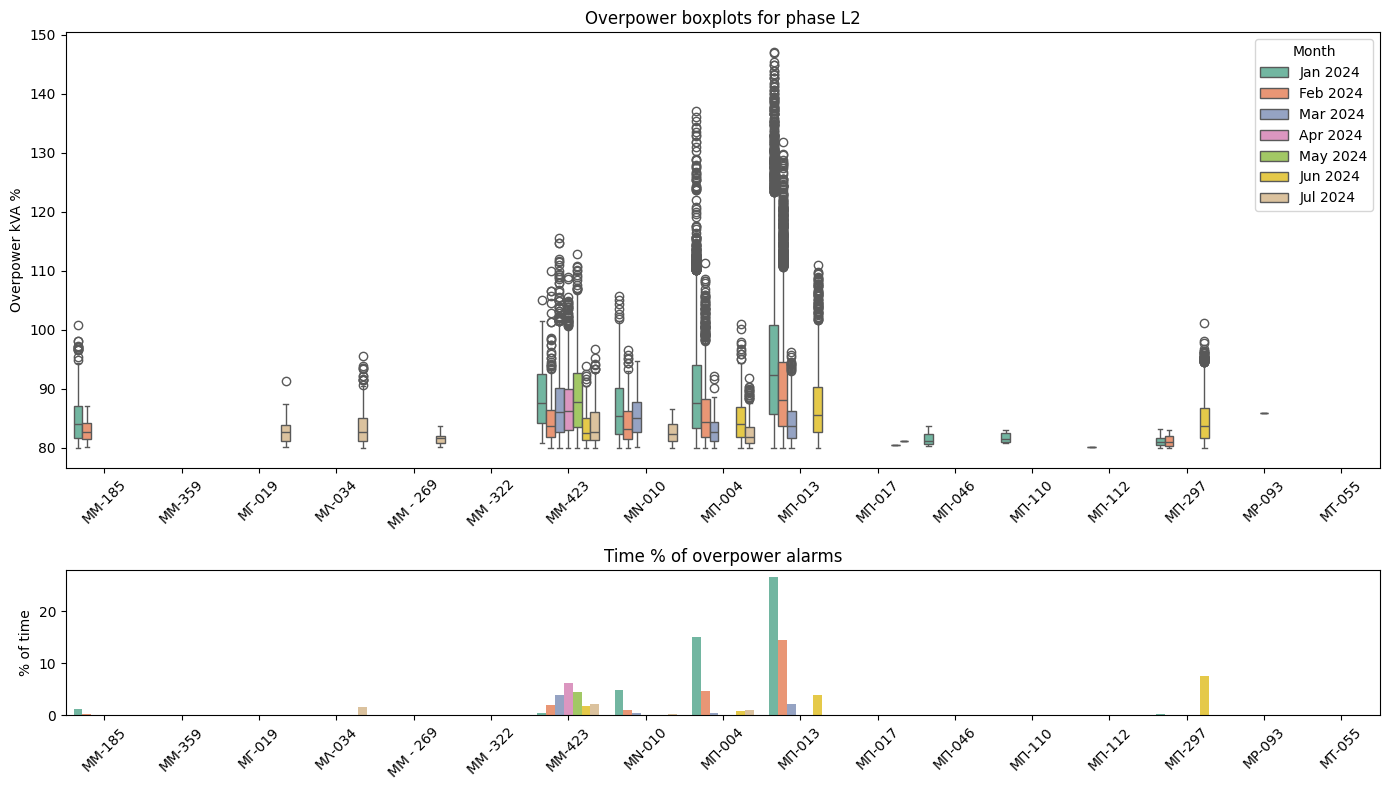

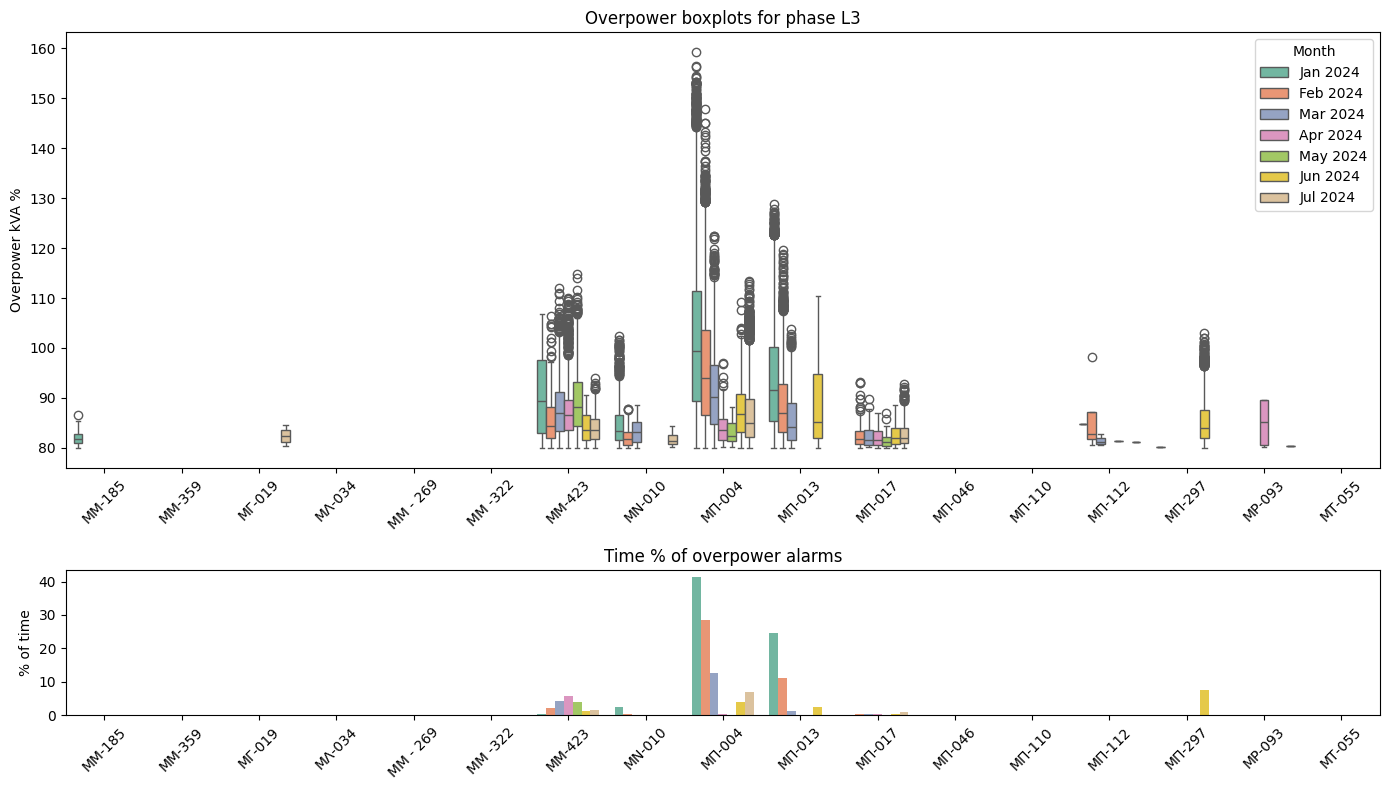

In [9]:
for ph in ['L1', 'L2', 'L3']:
    df = pd.DataFrame([])
    

    for name in ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun','Jul']:
        pwrdf = pd.DataFrame([])

        summary = pd.read_excel('HEDNO_overpwr_' + name + '_2024.xlsx', engine='openpyxl')
        summary = summary.loc[summary['Nr. of power alarms ' + ph] > 0]
        summary = summary[['Transformer', '% of time ' + ph]]
        
        summary['month'] = name + ' 2024'

        # Merge with the common_df to ensure all transformers are included
        set2 = set(list(summary['Transformer'].unique()))
        for transf in list(summary['Transformer'].unique()):
            filename = labeldict[transf]+'_'+phasedict[ph]+'_'+name+'_'+'2024.xlsx'
            tmp = pd.read_excel(filepath+filename, engine='openpyxl')
            tmp = tmp.drop('apwr'+phasedict[ph], axis=1)
            tmp = tmp.rename(columns={'exceed_perc' + phasedict[ph]:'kVA'})
            tmp['kVA'] = pd.to_numeric(tmp['kVA'])
            tmp['month'] = name+' 2024'
            # print(summary.loc[summary['Transformer']==transf,'% of time ' + ph])
            tmp['% of time ' + ph] = summary.loc[summary['Transformer']==transf,'% of time ' + ph].values[0]
            pwrdf = pd.concat([pwrdf, tmp])

        # print(pwrdf)

        # Find non-common elements using symmetric difference
        missing_transf = list(set1.symmetric_difference(set2))
        # Create a DataFrame with all combinations of transformers and months
        common_df = pd.DataFrame([t for t in missing_transf], columns=['Transformer'])
        common_df['month'] = name + ' 2024'
        common_df['% of time ' + ph] = 0.0
        common_df['kVA'] = np.nan
        pwrdf = pd.concat([pwrdf,common_df])

        df = pd.concat([df, pwrdf])
    
    

    # Map the custom order to the second column
    df['custom'] = df['month'].map(custom_dict)
    # Sort the DataFrame by the first column ascending and the custom order of the second column
    df = df.sort_values(by=['custom','Transformer'])
    # Drop the auxiliary column used for sorting
    df = df.drop(columns=['custom'])
    df = df.reset_index(drop=True)

    # plotfig(df, ph)
    multiplotfig(df,ph)

In [11]:
kpisdf.to_excel('totalKPI.xlsx')

NameError: name 'kpisdf' is not defined